In [1]:
import tensorflow as tf
# from keras import Dense
from tfkan import DenseKAN

from sklearn.datasets import make_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

In [2]:
seed_value = 0
import os, random
import numpy as np

os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

X, y = make_regression(n_samples=1000, n_features=10, n_informative=10, n_targets=1, noise=0.1)
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.reshape(-1, 1)).reshape(-1)
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [3]:
os.environ['PYTHONHASHSEED'] = str(seed_value)
random.seed(seed_value)
np.random.seed(seed_value)
tf.random.set_seed(seed_value)

l = DenseKAN(2, grid_size=20, basis_activation=None)
l.build(input_shape=(None, 10))

In [7]:
x = x_train[4:500:50]
lst = l.get_spline_list()
# print(lst)
print(sum([lst[i][0](x[0][i]) for i in range(10)]))

print(l(x))
# print(spline(x[0:1, 2:3], l.grid[0:1], l.spline_kernel[0:1, :, 0:1], l.spline_order))

tf.Tensor(0.007997489235874181, shape=(), dtype=float64)
tf.Tensor(
[[-0.03789443 -0.0038786 ]
 [-0.01162313 -0.02353121]
 [-0.00236349 -0.02298603]
 [-0.0411473  -0.01469057]
 [-0.03490483 -0.03274699]
 [-0.03957552 -0.0677322 ]
 [-0.07181671 -0.05919427]
 [-0.07223281  0.00347265]
 [-0.03060481  0.01098087]
 [-0.02921812 -0.01705656]], shape=(10, 2), dtype=float64)


In [7]:
# MLP
mlp = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
mlp.build(input_shape=(None, 10))
mlp.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 769 (3.00 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
%%time
mlp.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3), loss='mse', metrics=['mae'])
mlp_history = mlp.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=0)

CPU times: total: 5.92 s
Wall time: 10.8 s


In [5]:
# KAN
import keras
kan = tf.keras.models.Sequential([
    DenseKAN(4),
    DenseKAN(1, )
])

kan.build(input_shape=(None, 10))
# kan.summary()

In [6]:
%%time
kan.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=2e-3), loss='mse', metrics=['mae'])
kan_history = kan.fit(x_train, y_train, epochs=100, batch_size=64, validation_data=(x_test, y_test), verbose=0)



CPU times: total: 8.11 s
Wall time: 13.3 s


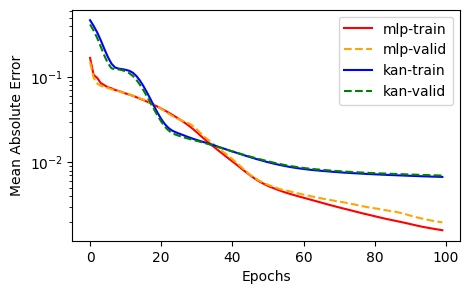

In [9]:
# plot history
fig = plt.figure(figsize=(5,3))
plt.semilogy(mlp_history.history['mae'], label='mlp-train', ls="-", color='red')
plt.semilogy(mlp_history.history['val_mae'], label='mlp-valid', ls="--", color='orange')
plt.semilogy(kan_history.history['mae'], label='kan-train', ls="-", color='blue')
plt.semilogy(kan_history.history['val_mae'], label='kan-valid', ls="--", color='green')
plt.xlabel("Epochs")
plt.ylabel("Mean Absolute Error")
plt.legend()